<a href="https://colab.research.google.com/github/jabedkhanjb/Salary-Prediction-Kaggle/blob/main/Profit_Prediction_with_Linear_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/profit.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.shape

(50, 5)

In [7]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [8]:
df

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Chittagong,191792.06
2,153441.51,101145.55,407934.54,Lakshmipur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Lakshmipur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Chittagong,156122.51
7,130298.13,145530.06,323876.68,Lakshmipur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Chittagong,149759.96


if there is a null value, need to find the mean value and insert them using fillno()

# Dependent & Independent Value

In [9]:
xyz = df[["Marketing Spend", "Administration", "Transport", "Area"]]

In [10]:
X = df.drop(["Profit"], axis=1)

In [11]:
X.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Chittagong
2,153441.51,101145.55,407934.54,Lakshmipur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Lakshmipur


In [12]:
y = df["Profit"]

In [13]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Now we need to encoding with the title of "Area" since Linear Regression doesn't work with string. It needs numerical value.

Two Types of Encoding. One Hot Encoding & Level Encoding

### One Hot Encoding

In [14]:
city = pd.get_dummies(X["Area"])

In [15]:
city.head()

,Chittagong,Dhaka,Lakshmipur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [16]:
#dropping area column since it's a string
X = X.drop("Area", axis = 1)

In [17]:
X

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [18]:
# Now let's concatenate the Area encoding data

X = pd.concat([X, city], axis = 1)

In [19]:
X

,Marketing Spend,Administration,Transport,Chittagong,Dhaka,Lakshmipur
0,114523.61,136897.80,471784.10,0,1,0
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,0,1,0
4,142107.34,91391.77,366168.42,0,0,1
5,131876.90,99814.71,362861.36,0,1,0
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,0,1
8,120542.52,148718.95,311613.29,0,1,0
9,123334.88,108679.17,304981.62,1,0,0


### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regr = LinearRegression()

In [24]:
regr.fit(xtrain, ytrain)

LinearRegression()

In [25]:
xtest

,Marketing Spend,Administration,Transport,Chittagong,Dhaka,Lakshmipur
28,66051.52,182645.56,118148.20,0,0,1
11,100671.96,91790.61,249744.55,1,0,0
10,101913.08,110594.11,229160.95,0,0,1
41,27892.92,84710.77,164470.71,0,0,1
2,153441.51,101145.55,407934.54,0,0,1
27,72107.60,127864.55,353183.81,0,1,0
38,20229.59,65947.93,185265.10,0,1,0
31,61136.38,152701.92,88218.23,0,1,0
22,73994.56,122782.75,303319.26,0,0,1
4,142107.34,91391.77,366168.42,0,0,1


In [26]:
ytest

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
Name: Profit, dtype: float64

### Prediction

In [27]:
guess = regr.predict(xtest)

In [28]:
guess

array([103501.08252967, 128011.28068536, 126695.43891075,  70573.91718714,
       173381.96874172, 124238.07860906,  69298.09250209,  98399.41936931,
       116419.14808652, 161430.9813474 ,  94740.73303042,  89920.22800446,
       105956.86065363])

### R-Squarded Value

In [29]:
from sklearn.metrics import r2_score

In [30]:
score = r2_score(ytest, guess)

In [31]:
score

0.8840978623817406

In [32]:
output = [i for i in range (1, len(guess)+1)]
output

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

### Data Visualization

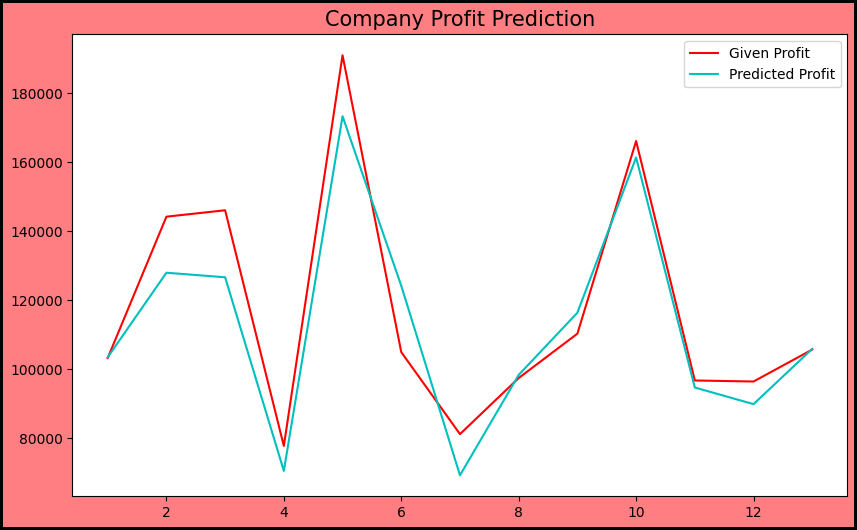

In [34]:
plt.figure(figsize = (10, 6), facecolor = "#fe7e81", edgecolor = "k", linewidth=3)
plt.plot(output, ytest, color = "r")
plt.plot(output, guess, color = "c")
plt.title("Company Profit Prediction", fontsize=15)
plt.legend(["Given Profit", "Predicted Profit"])
plt.show()

### Plotting the Error

In [35]:
error = ytest - guess
error

28     -218.702530
11    16248.119315
10    19426.511089
41     7224.912813
2     17668.421258
27   -19229.768609
38    11930.967498
31     -915.859369
22    -6066.898087
4      4756.958653
33     2038.186970
35     6559.281996
26     -223.320654
Name: Profit, dtype: float64

### Plotting Error Data

In [36]:
count = [i for i in range(1, len(error)+1)]

In [37]:
count

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

### Plotting 

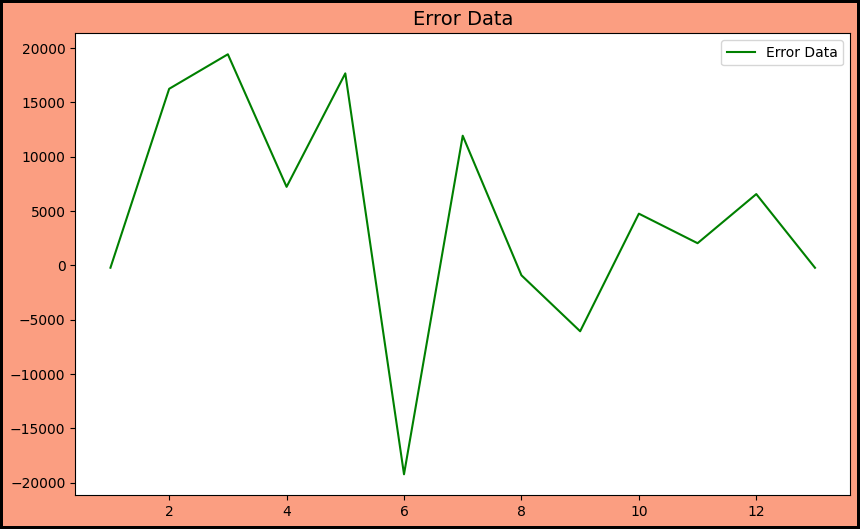

In [38]:
plt.figure(figsize = (10, 6), facecolor = "#fb9e81", edgecolor = "k", linewidth=3)
plt.plot(count, error, c="g")
plt.title("Error Data", fontsize = 14)
plt.legend(["Error Data"])
plt.show()